# Introduction to time-series analysis of HyP3 product with MintPy

## Introduction
This notebook shows you how to do time-series analysis against HyP3 product with MintPy. This tutorial assumes that you have already successfully installed the MintPy and created the conda environment.
Detail installation info is refferered at https://github.com/insarlab/MintPy.

## Run the application

Before running the program, some package need to be installed and imported.

In [1]:
!conda install -y -c conda-forge hyp3_sdk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
import os
import re
import glob
import zipfile
import numpy as np
import hyp3_sdk as sdk

Set project name, output directory and change to the output directory

In [3]:
projectname = input("project name:") or "case5"
outdir = input("home directory of the project") or "./tutorial"
os.system("mkdir -p {}".format(outdir))
print(projectname)
print(outdir)
os.chdir(outdir)

project name:case5
home directory of the project/media/jzhu4/data/hyp3-mintpy/case5
case5
/media/jzhu4/data/hyp3-mintpy/case5


### Download the hyp3 data

The granule_list file includes the RTC file names that users wants to use them to produce the interferograms for the time-series analysis purpose. Users usually prepare this file with ASF vertex (https://serach.asf.alaska.edu). In this example, we assume users have the granule_list in their hands. The content of the granule_list are:

User autentication

In [18]:
hyp3 = sdk.HyP3(prompt = True)

NASA Earthdata Login username: cirrusasf
NASA Earthdata Login password: ········


Submit the jobs with hyp3-sdk and download the files 

In [4]:
reference_granule = 'S1A_IW_SLC__1SSV_20160112T205113_20160112T205140_009466_00DBA8_C430'

secondary_granules = [
    'S1A_IW_SLC__1SSV_20160205T205112_20160205T205139_009816_00E5D1_997E',
    'S1A_IW_SLC__1SSV_20160229T205112_20160229T205139_010166_00EFF4_357E',
    'S1A_IW_SLC__1SSV_20160324T205112_20160324T205139_010516_00F9E8_FA1C',
    'S1A_IW_SLC__1SSV_20160417T205113_20160417T205140_010866_010443_7429',
    'S1A_IW_SLC__1SSV_20160511T205115_20160511T205142_011216_010F42_BD06',
    'S1A_IW_SLC__1SSV_20160604T205107_20160604T205135_011566_011A9C_EDD4',
    'S1A_IW_SLC__1SSV_20160628T205108_20160628T205136_011916_01259C_EE11'
]

In [21]:
insar_jobs = sdk.Batch()

for secondary_granule in secondary_granules:
    insar_jobs += hyp3.submit_insar_job(reference_granule, secondary_granule,
                                        name=projectname, include_inc_map=True,
                                        include_dem=True)

In [22]:
insar_jobs = hyp3.watch(insar_jobs)

  0%|          | 0/7 [timeout in 10800 s]

In [23]:
zip_files = insar_jobs.download_files()

for zip_file in zip_files:
    with zipfile.ZipFile(zip_file) as zip_ref:
        zip_ref.extractall(outdir)

  0%|          | 0/7 [00:00<?, ?it/s]

S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7.zip:   0%|          | 0/168262669 [00:00<?, ?it/s…

S1AA_20160112T205113_20160229T205112_VVP048_INT80_G_ueF_4446.zip:   0%|          | 0/169829344 [00:00<?, ?it/s…

S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB.zip:   0%|          | 0/169488409 [00:00<?, ?it/s…

S1AA_20160112T205113_20160417T205113_VVP096_INT80_G_ueF_D38F.zip:   0%|          | 0/169787434 [00:00<?, ?it/s…

S1AA_20160112T205113_20160511T205115_VVP120_INT80_G_ueF_90EB.zip:   0%|          | 0/168463441 [00:00<?, ?it/s…

S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6.zip:   0%|          | 0/118550767 [00:00<?, ?it/s…

S1AA_20160112T205113_20160628T205108_VVP168_INT80_G_ueF_73B2.zip:   0%|          | 0/118960014 [00:00<?, ?it/s…

Downloaded ifm files are here

In [5]:
! tree {outdir}

/media/jzhu4/data/hyp3-mintpy/case5
├── avgPhaseVelocity.h5
├── avgSpatialCoh.h5
├── case5.cfg
├── case5_granule.dat
├── coherenceSpatialAvg.txt
├── DEM
│   ├── dem_clip.tif
│   └── dem_clip.txt
├── demErr.h5
├── exclude_date.txt
├── inputs
│   ├── case5.cfg
│   ├── ERA5.h5
│   ├── geometryGeo.h5
│   ├── ifgramStack.h5
│   └── smallbaselineApp.cfg
├── maskConnComp.h5
├── maskTempCoh.h5
├── numInvIfgram.h5
├── pic
│   ├── avgPhaseVelocity.png
│   ├── avgSpatialCoh.png
│   ├── bperpHistory.pdf
│   ├── case5.cfg
│   ├── coherenceHistory.pdf
│   ├── coherenceMatrix.pdf
│   ├── coherenceSpatialAvg.txt
│   ├── exclude_date.txt
│   ├── geometryGeo.png
│   ├── maskConnComp.png
│   ├── maskTempCoh.png
│   ├── network.pdf
│   ├── numInvIfgram.png
│   ├── reference_date.txt
│   ├── rms_timeseriesResidual_ramp.pdf
│   ├── rms_timeseriesResidual_ramp.txt
│   ├── smallbaselineApp.cfg
│   ├── temporalCoherence.png
│   ├── timeseries_ERA5_demErr.png
│   ├── timeseries_ERA5.png
│   ├── timeseries.png
│

### Organize the data into the structure that MintPy requests

#### Clip the geotiff files in the current directory and its subdirectories

Define cutGeotiffsByLine function

In [25]:
from __future__ import print_function, absolute_import, division, unicode_literals
from osgeo import gdal

def open_gdal_file(filename):
    handle = gdal.Open(filename)
    return handle

def read_gdal_file_geo(filehandle, band=1):
    geotransform = filehandle.GetGeoTransform()
    geoproj = filehandle.GetProjection()
    return filehandle.RasterXSize, filehandle.RasterYSize, geotransform, geoproj

def getOrigins(files):

    ul = np.zeros((2,len(files)))
    lr = np.zeros((2,len(files)))

    for i in range(len(files)):
        x,y,trans,proj = read_gdal_file_geo(open_gdal_file(files[i]))
        ul[0,i] = trans[0]
        lr[0,i] = trans[0] + x*trans[1]
        ul[1,i] = trans[3]
        lr[1,i] = trans[3] + y*trans[5]

    return ul,lr,trans[1],trans[5]

def copyOrigins(files,all_coords,all_pixsize):
    ul = np.zeros((2,len(files)))
    lr = np.zeros((2,len(files)))

    for i in range(len(files)):
        coords = all_coords[i]
        ul[0,i] = coords[0]
        lr[0,i] = coords[2]
        ul[1,i] = coords[1]
        lr[1,i] = coords[3]
 
        if i == 0:
            xres = all_pixsize[i]
            yres = all_pixsize[i]

    return ul,lr,xres,yres

def cutGeotiffsByLine(files):
    ul,lr,xres,yres = getOrigins(files)
    
    diff_ul = np.zeros((2,len(files)))
    diff_ul[0] = (max(ul[0])-ul[0])/xres    
    diff_ul[1] = -1*(min(ul[1])-ul[1])/(-1*yres)

    print("Difference list:")
    print(diff_ul)

    lrx = min(lr[0])
    lry = max(lr[1])
    lenx = (lrx-max(ul[0])) / xres
    leny = -1*(lry-min(ul[1])) / (-1*yres)
    if leny < 0:
        leny = abs(leny)
        diff_ul[1] = diff_ul[1] * -1
    print("Size of output images {} x {}".format(lenx, leny))

    outfiles = []   
    for i in range(len(files)):
        outfile = files[i].replace(".tif","_clip.tif")
        print("Processing file {} to create file {}".format(files[i], outfile))
        gdal.Translate(outfile,files[i],srcWin=[diff_ul[0,i],diff_ul[1,i],lenx,leny])
        outfiles.append(outfile)

    return(outfiles)

Clip the files

In [26]:
# get files to be clipped in the outdir and its sub-directories.
files = []
pattern = ["*.tif"]                      
for dir,_,_ in os.walk(outdir):
    for item in pattern:
        files.extend(glob.glob(os.path.join(dir, item)))
# clip off files
cutGeotiffsByLine(files)    

Difference list:
[[106. 106. 106. 106. 106. 106. 106. 106. 106. 106. 106. 106. 106. 106.
  106. 106. 106. 106.   0.   0.   0.   0.   0.   0. 106. 106. 106. 106.
  106. 106. 106. 106. 106. 106. 106. 106.   0.   0.   0.   0.   0.   0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.
   -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.
   -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.]]
Size of output images 3449.0 x 2073.0
Processing file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_corr.tif to create file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_corr_clip.tif
Processing file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_201603

Processing file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6_unw_phase.tif to create file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6_unw_phase_clip.tif
Processing file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6_dem.tif to create file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6_dem_clip.tif
Processing file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6/S1AA_20160112T205113_20160604T205107_VVP144_INT80_G_ueF_26C6_inc_map.tif to create file /media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T2

['/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_corr_clip.tif',
 '/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_dem_clip.tif',
 '/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_inc_map_clip.tif',
 '/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_vert_disp_clip.tif',
 '/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB_amp_clip.tif',
 '/media/jzhu4/data/hyp3-mintpy/case6/S1AA_20160112T205113_20160324T205112_VVP072_INT80_G_ueF_56FB/S1AA_20160112T2

#### Copy metadata file and dem file to DEM subdirectory

In [27]:
# copy the *.txt and dem.tif in one subdirctory to DEM subdirectory
cmd = "mkdir -p {}/DEM {}/inputs".format(outdir, outdir)
! {cmd}
prefix = glob.glob('./*.zip')[0].split(".zip")[0]
fileprefix = os.path.basename(prefix)
txtfile = "{dir}/{fileprefix}.txt".format(dir = prefix, fileprefix = fileprefix)
demfile = "{dir}/{fileprefix}_dem_clip.tif".format(dir = prefix, fileprefix = fileprefix)
cmd = "cp {file} {data_dir}/DEM/dem_clip.txt".format(file = txtfile, data_dir = outdir)
! {cmd}
cmd = "cp {file} {data_dir}/DEM/dem_clip.tif".format(file = demfile, data_dir = outdir)    
! {cmd}

In [28]:
print("prepared data are at {}".format(outdir))

prepared data are at /media/jzhu4/data/hyp3-mintpy/case6


Prepared data structure are:

In [29]:
! tree {outdir}

/media/jzhu4/data/hyp3-mintpy/case6
├── DEM
│   ├── dem_clip.tif
│   └── dem_clip.txt
├── inputs
├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_amp_clip.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_amp.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_color_phase.kmz
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_color_phase.png
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_color_phase.png.aux.xml
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_corr_clip.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_corr.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_dem_clip.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_dem.tif
│   ├── S1AA_20160112T205113_20160205T205112_VVP024_INT80_G_ueF_65F7_inc_map_clip.tif
│   ├── S1

### Configure the custom cfg file in the outdir

Show the cunstom cfg file  

In [30]:
from pathlib import Path

config = f'''
mintpy.load.processor        = hyp3
##---------interferogram datasets:
mintpy.load.unwFile          = {outdir}/*/*unw_phase_clip.tif
mintpy.load.corFile          = {outdir}/*/*corr_clip.tif
##---------geometry datasets:
mintpy.load.demFile          = {outdir}/DEM/dem_clip.tif
##---------incAngleFile:
mintpy.load.incAngleFile    =  {outdir}/*/*inc_map_clip.tif
'''

config_file = f'{projectname}.cfg'
Path(config_file).write_text(config)

471

In [31]:
f=open(config_file)
lines = f.readlines()
print("\n".join(lines))
f.close()



mintpy.load.processor        = hyp3

##---------interferogram datasets:

mintpy.load.unwFile          = /media/jzhu4/data/hyp3-mintpy/case6/*/*unw_phase_clip.tif

mintpy.load.corFile          = /media/jzhu4/data/hyp3-mintpy/case6/*/*corr_clip.tif

##---------geometry datasets:

mintpy.load.demFile          = /media/jzhu4/data/hyp3-mintpy/case6/DEM/dem_clip.tif

##---------incAngleFile:

mintpy.load.incAngleFile    =  /media/jzhu4/data/hyp3-mintpy/case6/*/*inc_map_clip.tif



### Run Time-series Analysis application


In [32]:
from mintpy import smallbaselineApp
smallbaselineApp.main([config_file])


___________________________________________________________

  /##      /## /##             /##     /#######           
 | ###    /###|__/            | ##    | ##__  ##          
 | ####  /#### /## /#######  /######  | ##  \ ## /##   /##
 | ## ##/## ##| ##| ##__  ##|_  ##_/  | #######/| ##  | ##
 | ##  ###| ##| ##| ##  \ ##  | ##    | ##____/ | ##  | ##
 | ##\  # | ##| ##| ##  | ##  | ## /##| ##      | ##  | ##
 | ## \/  | ##| ##| ##  | ##  |  ####/| ##      |  #######
 |__/     |__/|__/|__/  |__/   \___/  |__/       \____  ##
                                                 /##  | ##
                                                |  ######/
   Miami InSAR Time-series software in Python    \______/ 
          MintPy v1.3.0, 2021-03-06
___________________________________________________________

--RUN-at-2021-06-11 12:50:30.580919--
Current directory: /media/jzhu4/data/hyp3-mintpy/case6
Run routine processing with smallbaselineApp.py on steps: ['load_data', 'modify_network', 'referenc

Input data seems to be geocoded. Lookup file not needed.

generate_mask.py /media/jzhu4/data/hyp3-mintpy/case6/inputs/ifgramStack.h5 --nonzero -o /media/jzhu4/data/hyp3-mintpy/case6/maskConnComp.h5 --update
input ifgramStack file: /media/jzhu4/data/hyp3-mintpy/case6/inputs/ifgramStack.h5
--------------------------------------------------
update mode: ON
1) output file /media/jzhu4/data/hyp3-mintpy/case6/maskConnComp.h5 NOT exist.
run or skip: run.
calculate the common mask of pixels with non-zero unwrapPhase value
[==================================================] 7/7    0s /     0s 
create HDF5 file: /media/jzhu4/data/hyp3-mintpy/case6/maskConnComp.h5 with w mode
create dataset /mask of bool       in size of (2073, 3449)         with compression=None
finished writing to /media/jzhu4/data/hyp3-mintpy/case6/maskConnComp.h5

temporal_average.py /media/jzhu4/data/hyp3-mintpy/case6/inputs/ifgramStack.h5 --dataset coherence -o /media/jzhu4/data/hyp3-mintpy/case6/avgSpatialCoh.h5 --update


[==================================================] 5157722/5157722 pixels  348s /     7s 
converting LOS phase unit from radian to meter
--------------------------------------------------
open  HDF5 file timeseries.h5 in a mode
writing dataset /timeseries                block: [0, 8, 0, 2070, 0, 3449]
close HDF5 file timeseries.h5.
--------------------------------------------------
open  HDF5 file temporalCoherence.h5 in a mode
writing dataset /temporalCoherence         block: [0, 2070, 0, 3449]
close HDF5 file temporalCoherence.h5.
--------------------------------------------------
open  HDF5 file numInvIfgram.h5 in a mode
writing dataset /mask                      block: [0, 2070, 0, 3449]
close HDF5 file numInvIfgram.h5.
time used: 05 mins 54.5 secs.


------- processing patch 2 out of 2 --------------
box width:  3449
box length: 3
calculating weight from spatial coherence ...
reading coherence in (0, 2070, 3449, 2073) * 7 ...
convert coherence to weight in chunks of 100000 pixel

2021-06-11 12:56:35,266 INFO Welcome to the CDS
2021-06-11 12:56:35,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2021-06-11 12:56:35,479 INFO Request is queued
2021-06-11 12:56:36,683 INFO Request is running
2021-06-11 12:56:40,854 INFO Request is completed
2021-06-11 12:56:40,855 INFO Downloading https://download-0015.copernicus-climate.eu/cache-compute-0015/cache/data1/adaptor.mars.internal-1623444995.479895-338-3-386641af-d553-48c7-ba65-0308ae67565f.grib to /media/jzhu4/my1text4/data/mintpy_data/ERA5/ERA5_N30_N40_E130_E150_20160112_21.grb (741.4K)
2021-06-11 12:56:43,090 INFO Download rate 331.8K/s


INFO: You are using the latest ECMWF platform for downloading datasets: https://cds.climate.copernicus.eu/api/v2
INFO: You are using the latest ECMWF platform for downloading datasets: https://cds.climate.copernicus.eu/api/v2
update mode: ON
output file: /media/jzhu4/data/hyp3-mintpy/case6/inputs/ERA5.h5
1) output file either do NOT exist or is NOT newer than all GRIB files.
run or skip: run
open geometry file: geometryGeo.h5
reading incidenceAngle  data from file: /media/jzhu4/data/hyp3-mintpy/case6/inputs/geometryGeo.h5 ...
reading height          data from file: /media/jzhu4/data/hyp3-mintpy/case6/inputs/geometryGeo.h5 ...
--------------------------------------------------
create HDF5 file: /media/jzhu4/data/hyp3-mintpy/case6/inputs/ERA5.h5 with w mode
create dataset  : date       of |S8                       in size of (8,)                 with compression = None
create dataset  : timeseries of <class 'numpy.float32'>   in size of (8, 2073, 3449)      with compression = None
close 

view.py --dpi 150 --noverbose --nodisplay --update numInvIfgram.h5 --mask no
copy *.txt files into ./pic directory.
move *.png/pdf/kmz files to ./pic directory.
time used: 01 mins 1.3 secs.
Explore more info & visualization options with the following scripts:
        info.py                    #check HDF5 file structure and metadata
        view.py                    #2D map view
        tsview.py                  #1D point time-series (interactive)   
        transect.py                #1D profile (interactive)
        plot_coherence_matrix.py   #plot coherence matrix for one pixel (interactive)
        plot_network.py            #plot network configuration of the dataset    
        plot_transection.py        #plot 1D profile along a line of a 2D matrix (interactive)
        save_kmz.py                #generate Google Earth KMZ file in raster image
        save_kmz_timeseries.py     #generate Goodle Earth KMZ file in points for time-series (interactive)
        
Go back to directory:

## Display the analysis results

There are a few scripts used to display the analysis results. There are in the MINTPY_HOME/mintpy. Here we show two majoy disaply scripts.

### Disaply velocity of displacement


run view.py in MintPy release version v1.3.0, release date 2021-03-06
input file is velocity file: /media/jzhu4/data/hyp3-mintpy/case6/velocity.h5 in float32 format
file size in y/x: (2073, 3449)
num of datasets in file velocity.h5: 2
datasets to exclude (0):
[]
datasets to display (2):
['velocity', 'velocityStd']
data   coverage in y/x: (0, 0, 3449, 2073)
subset coverage in y/x: (0, 0, 3449, 2073)
data   coverage in lat/lon: (604960.0, 4051840.0, 880880.0, 3886000.0)
subset coverage in lat/lon: (604960.0, 4051840.0, 880880.0, 3886000.0)
------------------------------------------------------------------------
colormap: jet
figure title: velocity
figure size : [15.00, 8.00]
dataset number: 2
row     number: 1
column  number: 2
figure  number: 1
read mask from file: maskTempCoh.h5
----------------------------------------
Figure 1 - velocity.png


<IPython.core.display.Javascript object>


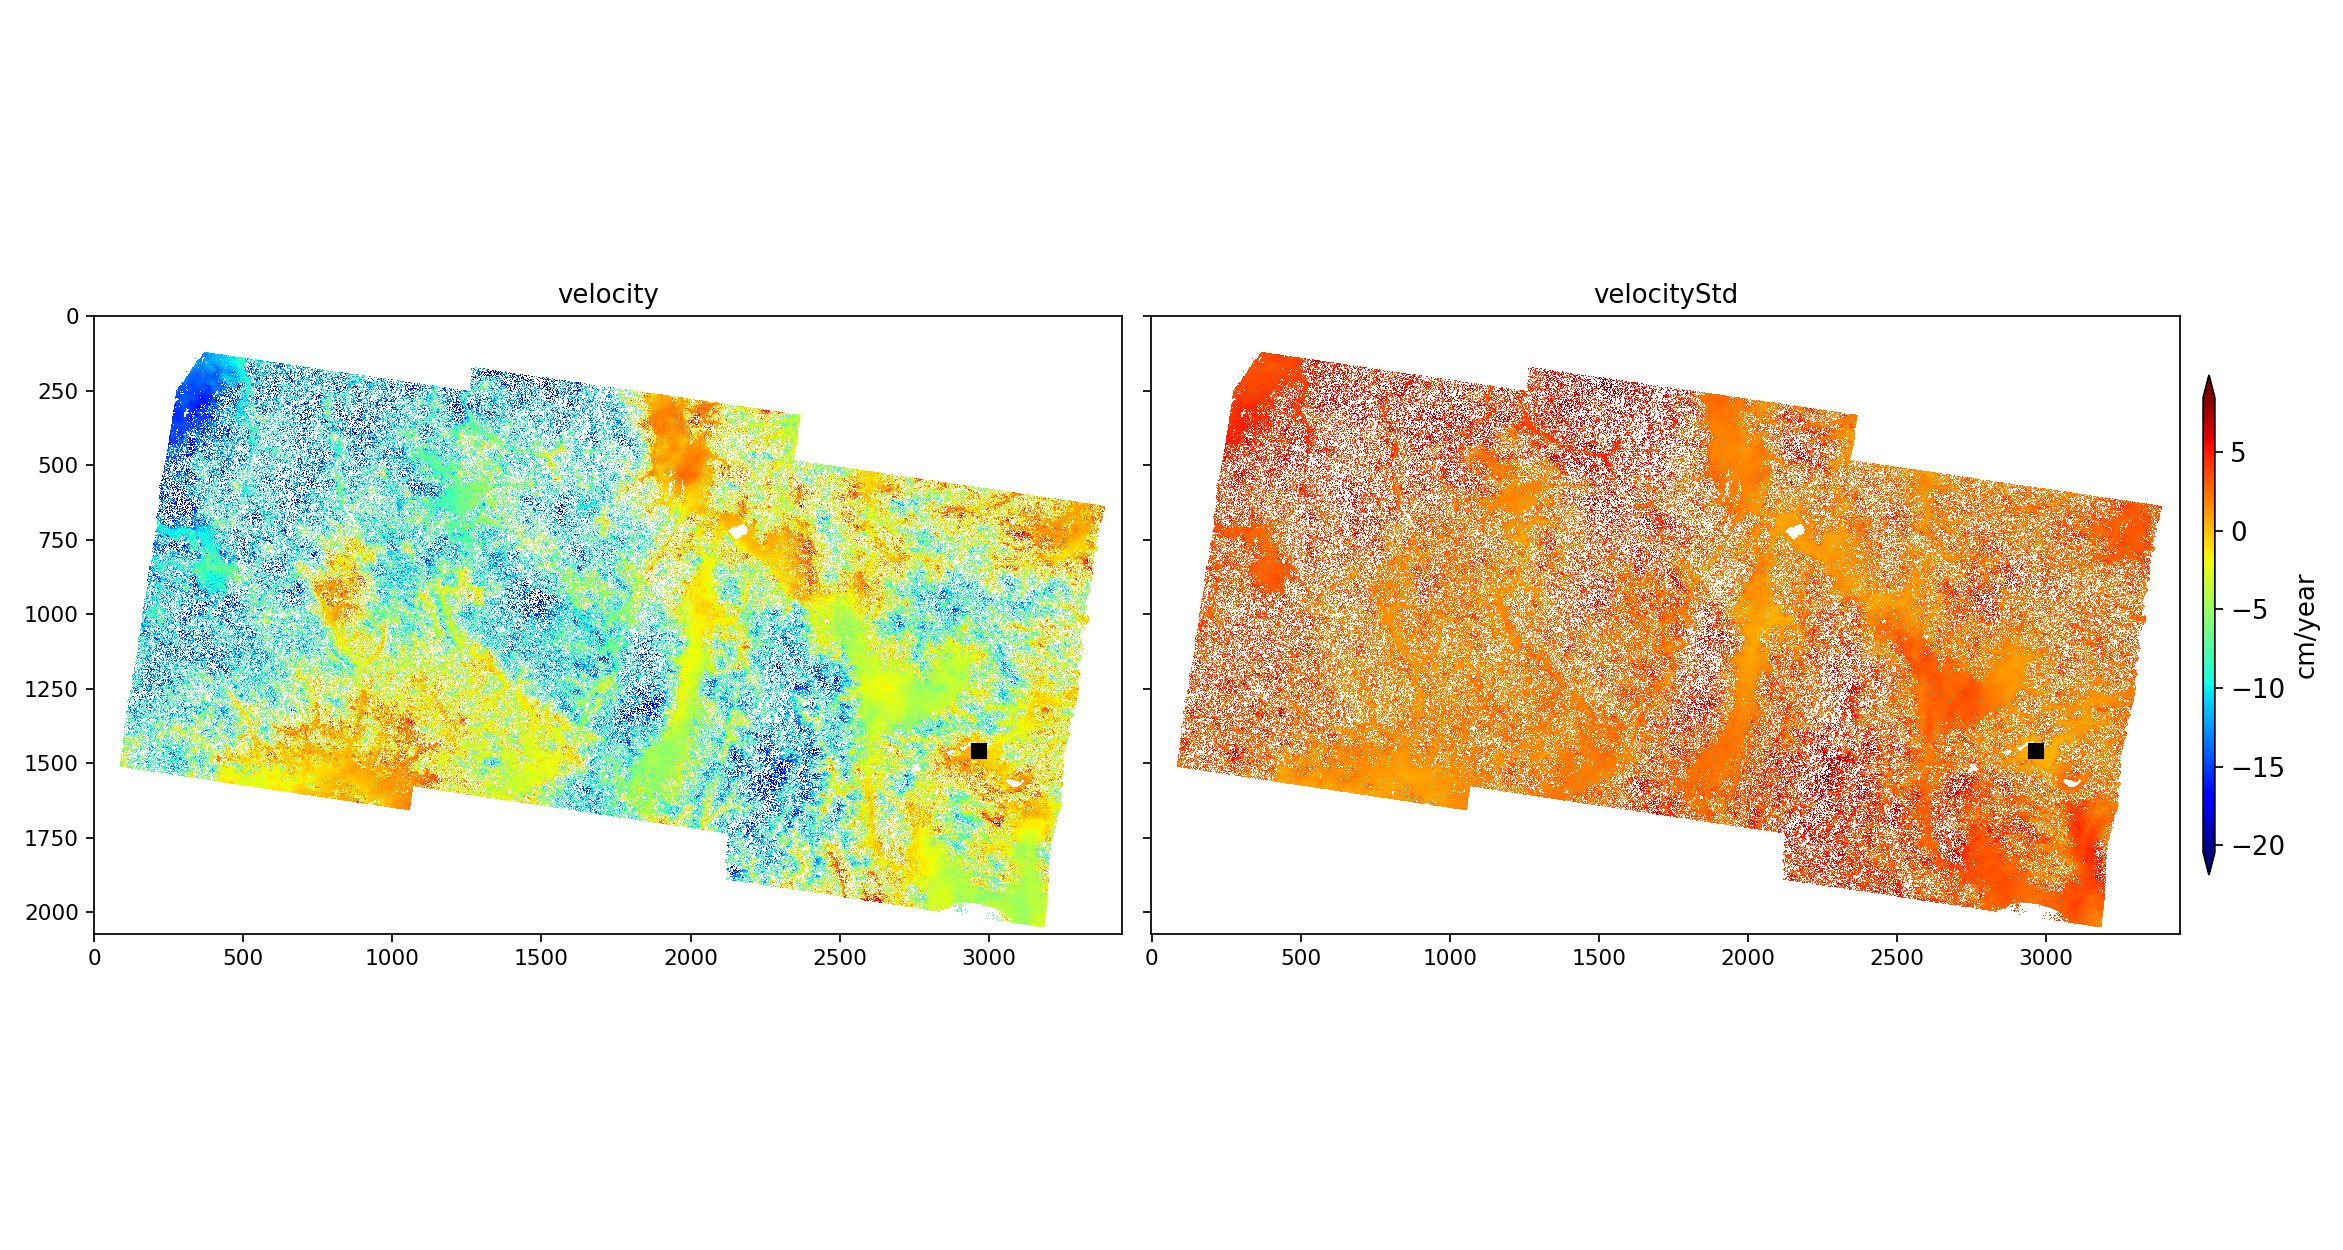

reading data as a list of 2D matrices ...
[==================================================] velocityStd 0s /     0s 
data    range: [-26.969862, 11.401742] cm/year
display range: [-26.969862, 11.401742] cm/year
masking data
plotting ...
[==================================================] velocityStd 0s /     0s 
data    range: [-26.969862, 11.401742] cm/year
display range: [-20.454874, 8.477491] cm/year
show colorbar
showing ...


In [33]:
%matplotlib notebook
from mintpy import view
view.main(['velocity.h5'])

### Display the time-series of displacement

tsview.py timeseries.h5
open timeseries file: timeseries.h5
No lookup table info range/lat found in files.
data   coverage in y/x: (0, 0, 3449, 2073)
subset coverage in y/x: (0, 0, 3449, 2073)
data   coverage in lat/lon: (604960.0, 4051840.0, 880880.0, 3886000.0)
subset coverage in lat/lon: (604960.0, 4051840.0, 880880.0, 3886000.0)
------------------------------------------------------------------------
reading timeseries from file timeseries.h5 ...
reference to date: 20160112
read mask from file: maskTempCoh.h5
data    range: [-11.298927, 9.789478] cm
display range: [-7.2659106, 5.3500257] cm
figure size : [9.60, 6.00]


<IPython.core.display.Javascript object>


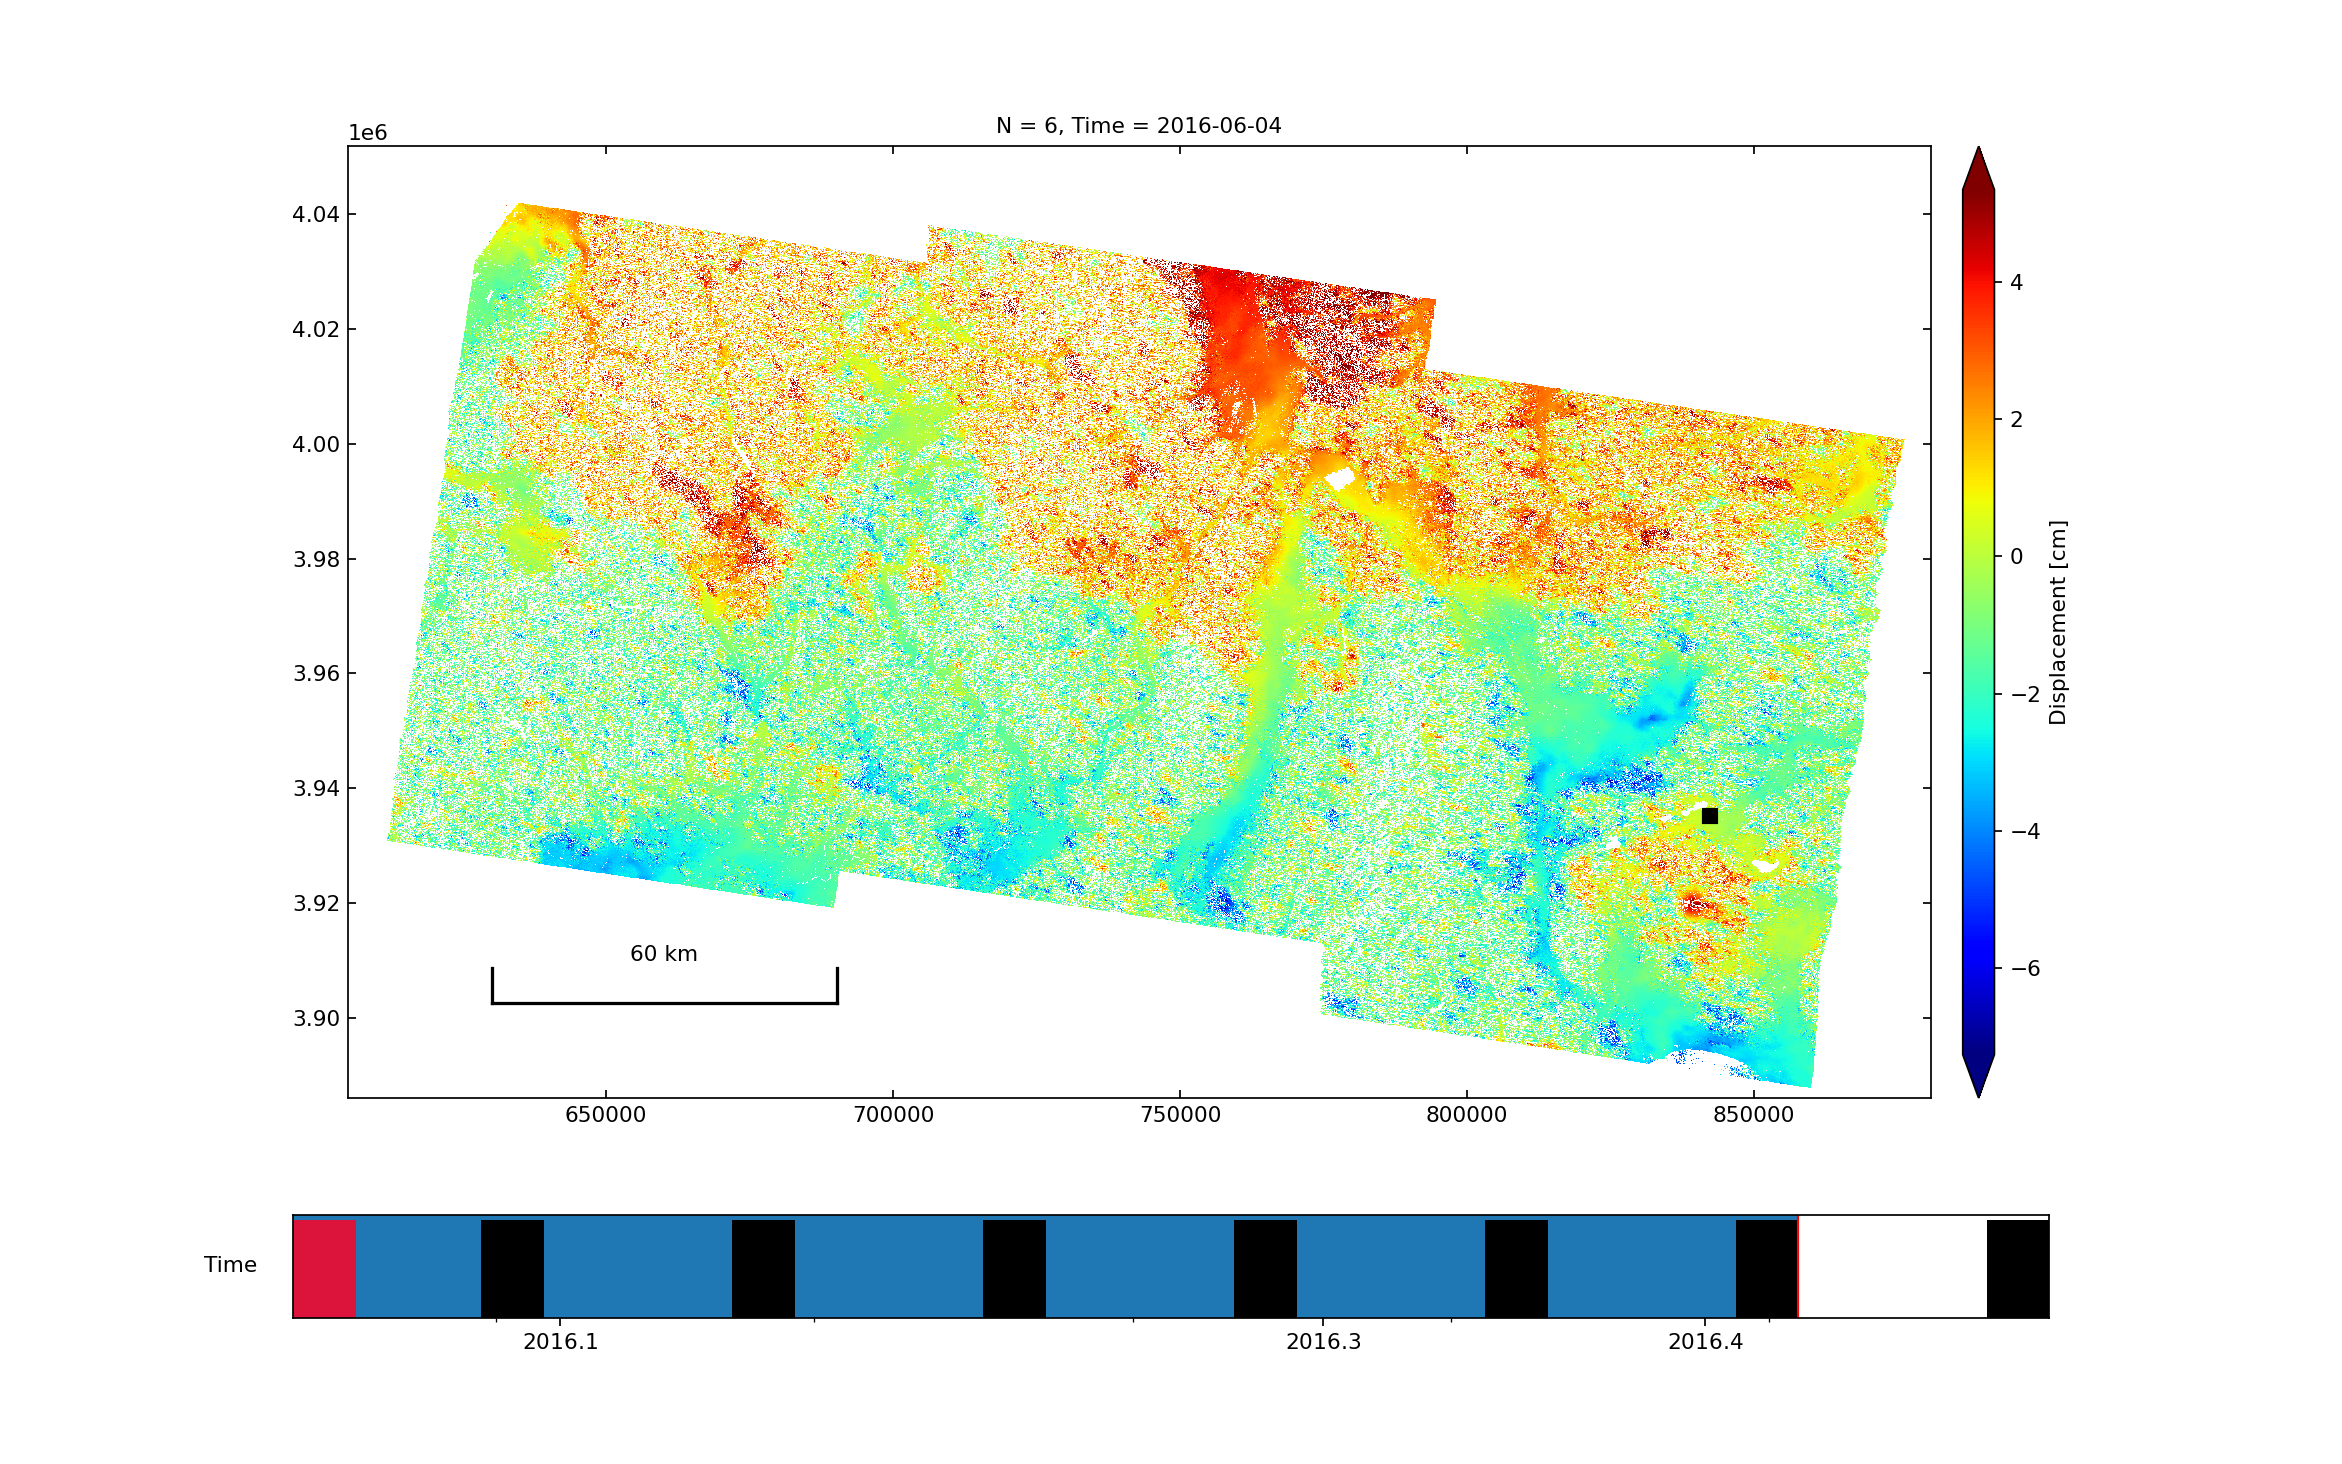

display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
plot reference point


<IPython.core.display.Javascript object>


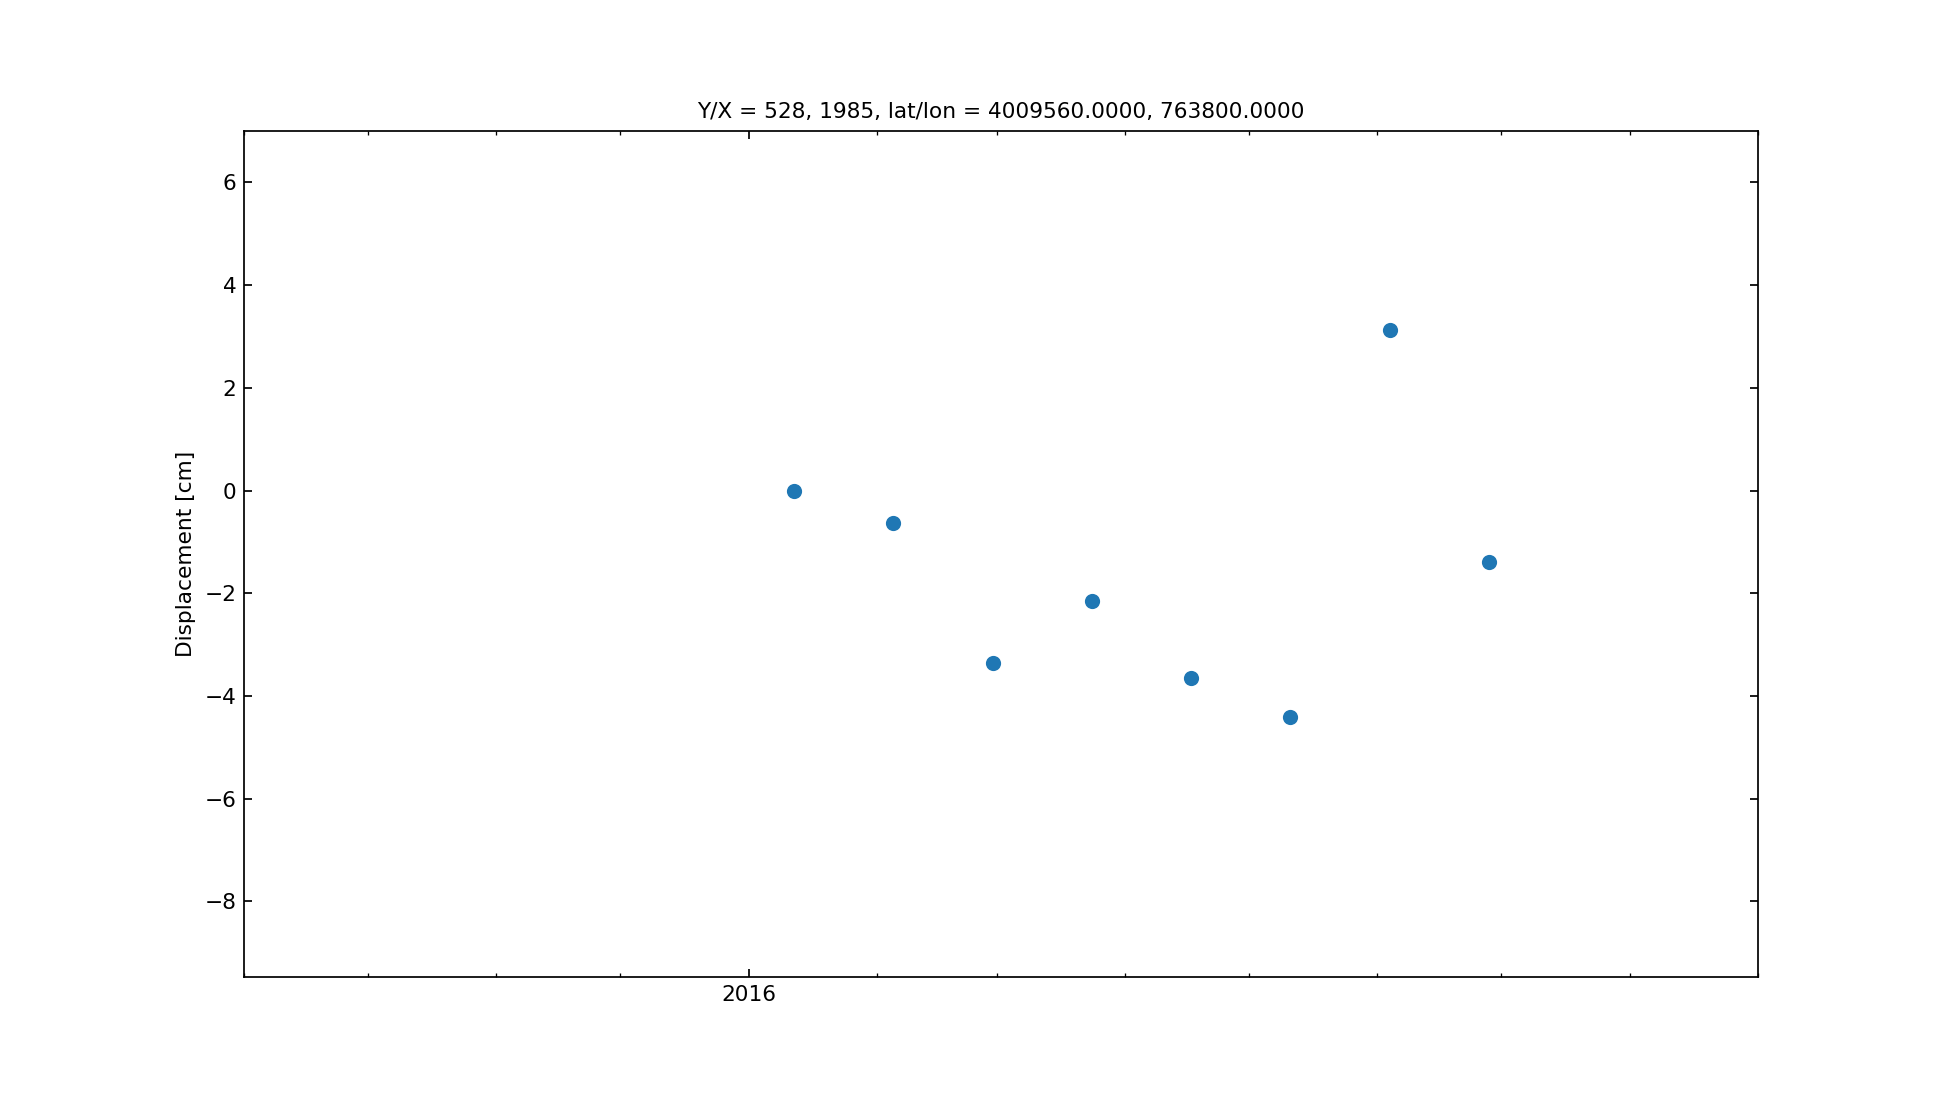

showing ...

------------------------------------------------------------------------
To scroll through the image sequence:
1) Move the slider, OR
2) Press left or right arrow key (if not responding, click the image and try again).
------------------------------------------------------------------------


In [34]:
%matplotlib notebook
from mintpy import tsview
tsview.main(['timeseries.h5'])